In [12]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
import progress_learner
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [13]:
p = project.Project.load("../slidearound_project.proj")

In [17]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
# reload(value_estimator)
reload(action_learner_search)
reload(progress_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

with tf.variable_scope("search") as scope:
    policy_estimator = action_learner_search.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = progress_learner.EventProgressEstimator(is_training=False, name = p.name, config = c)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, '../progress_SlideAround.mod')

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ../progress_SlideAround.mod


In [ ]:
c.progress_threshold=0.93
reload(action_learner_search)
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, session = sess)
explorations = action_ln.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0


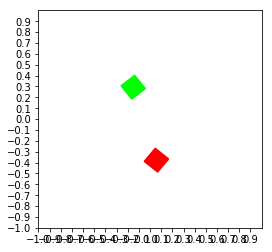

(array([ 0.,  0.,  0.], dtype=float32), array([ 2. ,  2. ,  0.5], dtype=float32))
[-0.78010872  0.5668363   0.92859847]
[[ 0.   0.   0.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.   0.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.   0.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [-1.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   0.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [ 0.   1.   1.   0.  -1.   0.   0.5]
 [-1.   1.   1.   0.  -1.   0.   0.5]]
Progress = 0.86; reward = 0.86


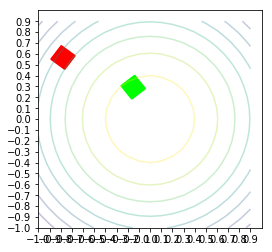

In [19]:
explorations[0].replay(verbose = True)

In [174]:
print (explorations[0].start_config)

for _, from_t, to_t, _, _, success, _, _ in explorations[0].action_storage:
    print (str(from_t) + " " + str(to_t) + " " + str(success) ) 

[Cube : [ 0.55916773 -0.45340549  0.38294344], Cube : [-0.40964779 -0.12172395  1.27858668]]
[ 0.55916773 -0.45340549  0.38294344] [ 0.54158484  0.86653476  0.79448832] True
[ 0.54158484  0.86653476  0.79448832] [-0.49951228 -0.69036695  0.15960644] True
[-0.49951228 -0.69036695  0.15960644] [ 0.41131718 -0.26221855  0.36441135] True
[ 0.41131718 -0.26221855  0.36441135] [ 0.41131718 -0.26221855  0.36441135] True
[ 0.41131718 -0.26221855  0.36441135] [ 0.41131718 -0.26221855  0.36441135] True


In [4]:
a = block_movement_env.BlockMovementEnv(c, p.speed, progress_estimator = progress_estimator, session = sess)

In [9]:
a.test_case(a.bad_case_2)

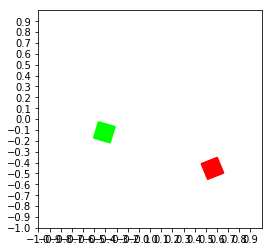

(None, None)
[ 0.54158484  0.86653476  0.79448832]
[[  5.97815504e-01  -2.88982756e-01   6.56714307e-01  -4.26935396e-01
    5.18761667e-01  -4.85834199e-01   4.59862864e-01  -3.47881559e-01
   -2.91269967e-03   6.67894730e-02  -8.66839674e-05   6.80305677e-02
    1.15441067e-03   6.52045520e-02  -1.67160503e-03   6.39634573e-02
   -4.59863348e-01  -2.82980558e-02  -3.16221896e-01  -7.15083917e-02
   -3.59432232e-01  -2.15149844e-01  -5.03073684e-01  -1.71939508e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.05767885e+00  -2.60684700e-01   9.72936203e-01  -3.55427005e-01
    8.78193898e-01  -2.70684355e-01   9.62936548e-01  -1.75942050e-01]
 [  5.94902805e-01  -2.22193283e-01   6.56627623e-01  -3.58904829e-01
    5.19916077e-01  -4.20629647e-01   4.58191259e-01  -2.83918101e-01
   -2.92857466e-03   6.67474633e-02  -1.28693743e-04   6.80464427e-02
    1.17028566e-03   6.52465617e-02  -

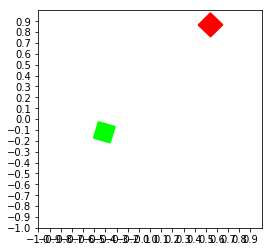

(None, None)
[-0.49951228 -0.69036695  0.15960644]
[[  5.96946508e-01  -2.69012591e-01   6.56692777e-01  -4.06600321e-01
    5.19105047e-01  -4.66346590e-01   4.59358778e-01  -3.28758860e-01
   -7.08357206e-03   1.61448859e-01  -3.12293006e-04   1.64591745e-01
    2.83059363e-03   1.57820466e-01  -3.94068543e-03   1.54677580e-01
   -4.59863348e-01  -2.82980558e-02  -3.16221896e-01  -7.15083917e-02
   -3.59432232e-01  -2.15149844e-01  -5.03073684e-01  -1.71939508e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.05680986e+00  -2.40714535e-01   9.72914673e-01  -3.35091929e-01
    8.78537279e-01  -2.51196745e-01   9.62432462e-01  -1.56819351e-01]
 [  5.89862936e-01  -1.07563732e-01   6.56380484e-01  -2.42008575e-01
    5.21935641e-01  -3.08526123e-01   4.55418093e-01  -1.74081280e-01
   -7.16769316e-03   1.61199987e-01  -5.61164637e-04   1.64675866e-01
    2.91471472e-03   1.58069338e-01  -

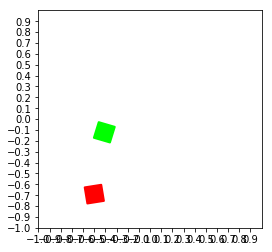

(None, None)
[ 0.41131718 -0.26221855  0.36441135]
[[  5.89942178e-01  -1.09357392e-01   6.56385316e-01  -2.43839024e-01
    5.21903684e-01  -3.10282162e-01   4.55460546e-01  -1.75800530e-01
   -9.44131389e-03   2.11962371e-01  -7.86591985e-04   2.16596742e-01
    3.84777834e-03   2.07942020e-01  -4.80694357e-03   2.03307649e-01
   -4.59863348e-01  -2.82980558e-02  -3.16221896e-01  -7.15083917e-02
   -3.59432232e-01  -2.15149844e-01  -5.03073684e-01  -1.71939508e-01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.04980553e+00  -8.10593361e-02   9.72607212e-01  -1.72330632e-01
    8.81335916e-01  -9.51323181e-02   9.58534230e-01  -3.86102193e-03]
 [  5.80500864e-01   1.02604979e-01   6.55598724e-01  -2.72422824e-02
    5.25751462e-01  -1.02340143e-01   4.50653602e-01   2.75071191e-02
   -9.55857689e-03   2.11523417e-01  -1.22554618e-03   2.16714005e-01
    3.96504134e-03   2.08380974e-01  -

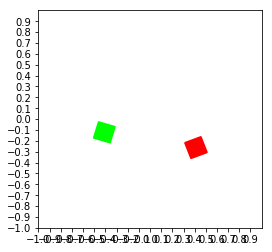

In [10]:
a.replay(verbose = True)

In [182]:
import numpy as np
a = np.zeros((2,3))

In [183]:
np.reshape(a, [-1])

array([ 0.,  0.,  0.,  0.,  0.,  0.])

In [184]:
a

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [185]:
a.shape

(2, 3)

In [186]:
a.shape[1:]

(3,)

In [11]:
import numpy as np 

In [15]:
inputs = np.zeros((20, 7))
inputs[:,1] = [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  1.,  0., -1., -1.,  0.,  1., -1.,  0.,  1.,  1.,  0.,  0.,  1.]
inputs = np.repeat(np.expand_dims(inputs, axis = 0), c.batch_size, axis = 0)

progress_estimator.predict(inputs, sess = sess)

array([ 0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679,
        0.00028679,  0.00028679,  0.00028679,  0.00028679,  0.00028679], dtype=float32)